# Prediction using Supervised ML

## Linear Regression 
The data set contains details of 25 students, how long they study and the percentage of marks the score. We aim to be able to predict the pecentage a student scores, when the number of hours he studied is given.

**Data set :** http://bit.ly/w-data

In [2]:
#Importing required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Fetching data from link

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


To get a brief understanding of the data, let us plot the data with hours of study on X-axis and percentage obtained on the Y-axis

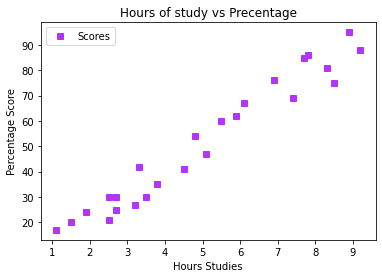

In [4]:
# Hours of study vs Precentage

data.plot(x='Hours', y='Scores', style='s', color=[0.7,0.2,1])
plt.title('Hours of study vs Precentage')
plt.xlabel('Hours Studies')
plt.ylabel('Percentage Score')
plt.show()

### Preparing the data

Dividing data into "attributes" (inputs) and "labels" (outputs).

In [5]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

### Training the Algorithm

Spliting data into training and test set using Scikit-learns built-in split method and then train our algorithm.

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [7]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print("Training complete")

Training complete


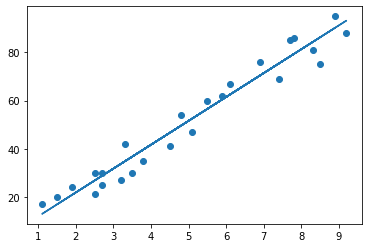

In [8]:
# Plotting the regression line
# line = regressor.predict(X)
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions

Now that our algorithm is trained, lets make some predictions.

In [9]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [10]:
Y = regressor.predict(X_test)
Y

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [11]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': Y})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
# Testing with 9.25 hours 

score = regressor.predict([[9.25]])
score

array([93.69173249])

### Evaluating the model

To evaluate the performance of algorithm, we will calculate the mean square error to compare how our algorithm performs on a particular dataset.

In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y)) 

Mean Absolute Error: 4.183859899002982
